# NumPy 레퍼런스 문서 / 배열 객체 / 반복

https://numpy.org/doc/stable/reference/routines.html

2025/3/17 최초 추가

In [1]:
import numpy as np

## Array Creation

### empty()

### ones()

### ones_like()


In [2]:
a1 = np.ones(5)
# array([1., 1., 1., 1., 1.])
a2 = np.ones((5,), dtype=int)
# array([1, 1, 1, 1, 1])
a3 = np.ones((2, 1))
# array([[1.],
#        [1.]])
a4 = np.ones((2, 2))
# array([[1.,  1.],
#        [1.,  1.]])
a1, a2, a3, a4

(array([1., 1., 1., 1., 1.]),
 array([1, 1, 1, 1, 1]),
 array([[1.],
        [1.]]),
 array([[1., 1.],
        [1., 1.]]))

## Array Manipulation

### reshape()
- shape
  - int 또는 정수의 튜플
    - 새 모양은 원래 모양과 호환되어야 합니다. 
    - 정수인 경우, 결과는 해당 길이의 1-D 배열이 됩니다. 
    - 튜플 디멘전 중 하나는 -1일 수 있습니다. 이 경우 배열의 길이와 나머지 치수에서 값을 유추합니다.



In [ ]:
import numpy as np
a = np.arange(6).reshape((3, 2))
print(a)

print(np.reshape(a, (2, 3))) # C-like index ordering
print(np.reshape(np.ravel(a), (2, 3)))  # equivalent to C ravel then C reshape
print(np.reshape(a, (2, 3), order='F'))  # Fortran-like index ordering
print(np.reshape(np.ravel(a, order='F'), (2, 3), order='F'))

# ?? ravel 이 뭔가??

[[0 1]
 [2 3]
 [4 5]]
[[0 1 2]
 [3 4 5]]
[[0 1 2]
 [3 4 5]]
[[0 4 3]
 [2 1 5]]
[[0 4 3]
 [2 1 5]]


In [5]:
import numpy as np
a = np.array([[1,2,3], [4,5,6]])
print(a)

print(np.reshape(a, 6))
# array([1, 2, 3, 4, 5, 6])
print(np.reshape(a, 6, order='F'))
# array([1, 4, 2, 5, 3, 6])

print(np.reshape(a, (3,-1)))       # the unspecified value is inferred to be 2

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]
[1 4 2 5 3 6]
[[1 2]
 [3 4]
 [5 6]]


## Indexing
https://numpy.org/doc/stable/reference/routines.indexing.html

#### numpy.unravel_index(indices, shape, order='C')

플랫 인덱스 또는 플랫 인덱스 배열을 좌표 배열 튜플로 변환합니다.

> 주: 평탄화된 인덱스를 다차원 인덱스로 변환하는 것이다.

- indices:
  - 요소가 shape 차원의 배열의 평면화된 버전에 대한 인덱스인 정수 배열.
  - 버전 1.6.0 이전에는 이 함수가 하나의 인덱스 값만 허용했습니다.
- shape:
  - indices를 풀어내는 데 사용할 배열의 shape









In [ ]:
import numpy as np

np.unravel_index([22, 41, 37], (7,6))
# (array([3, 6, 6]), array([4, 5, 1]))

# 이건 함수를 세번 호출할 것을 한번에 호출하는 것과 다를바 없다.
# np.unravel_index(22, (7,6)), np.unravel_index(41, (7,6)), ..
# 단, 결과를 표현할 때에 형식이 좀 특이하니 주의.

(array([3, 6, 6]), array([4, 5, 1]))

In [ ]:
np.unravel_index([31, 41, 13], (7,6), order='F')
# (array([3, 6, 6]), array([4, 5, 1]))

(array([3, 6, 6]), array([4, 5, 1]))

In [ ]:
print(np.unravel_index(1621, (6,7,8,9)))
# (3, 1, 4, 1)

print(1621//9//8//7%6, 1621//9//8%7, 1621//9%8, 1621%9)
# 3 1 4 1

(3, 1, 4, 1)
3 1 4 1


## Linear Algebra

### dot

https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot

> 주: 이 dot product 함수는 참 많은 역할을 수행하는 복잡한 함수이다. 충분히 이해해 두어야 한다.

두 배열의 도트 곱입니다. 구체적으로

- a와 b가 모두 1-D 배열인 경우 벡터의 내적 곱입니다. (복잡한 공액(? conjugate) 없이).
- a와 b가 모두 2-D 배열인 경우 행렬 곱셈이 되지만, `matmul` 또는 `a @ b`를 사용하는 것이 좋습니다.
- a 또는 b가 0-D(스칼라)인 경우 `multiply()`와 같으며 `numpy.multiply(a, b)` 또는 `a * b`를 사용하는 것이 좋습니다.
- a가 N차원 배열이고 b가 1-D 배열인 경우 a와 b의 마지막 축을 합(sum product)한 값입니다.
- a가 N차원 배열이고 b가 M차원 배열(여기서 M>=2)인 경우, 아래 두 축의 sum-product 입니다.
  - a의 마지막 축 (N번째 축)
  - b의 마지막에서 두번째의 축 (M-1번째 축)  <- 이 조건이 중요하다!
  - `dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])`

리턴값
- output: ndarray
  - a 와 b 의 점곱 (dot product) 을 반환합니다.
  - a 와 b 가 모두 스칼라이거나 모두 1차원 배열이면 스칼라가 반환됩니다. (1D 배열일 경우만 특별히 처리함)
  - 그렇지 않으면 배열이 반환됩니다.
  - 인자에 out이 주어지면 out이 반환됩니다.


In [ ]:
# import numpy as np
print(np.dot([2j, 3j], [2j, 3j]))
# (-13+0j)

# For 2-D arrays it is the matrix product:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
print(np.dot(a, b))


(-13+0j)
[[4 1]
 [2 2]]


In [44]:
# 연습

# sum-product 하는 축의 길이는 동일해야 한다.
try:
    print(np.dot([1, 2], [3, 4, 5]))
except Exception as e:
    print(e)

# 그냥 *
print('normal multiply:\n%s' % (np.array([[1, 2]]) * [[3],[4]]))  # (1,2) 와 (2,1) 의 스칼라곱
print('dot product (1,2)·(2,1):', np.dot([[1, 2]], [[3],[4]] ))  # (1,2) 와 (2,1) 의 점곱
print('dot product (2,)·(2,):', np.dot([1, 2], [3,4]))  # (2,) 와 (2,) 의 점곱



shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)
normal multiply:
[[3 6]
 [4 8]]
dot product (1,2)·(2,1): [[11]]
dot product (2,)·(2,): 11


In [ ]:
### 연습
t2 = np.arange(2*3*4).reshape((2,3,4))
print(t2,'<--- t2')
t3 = t2[::-1].reshape(3,4,2)
print(t3,'<--- t3')

t21 = t2[1,0,:]
t31 = t3[2,:,1]
print(f'\n t2[1,0,:]={t21}, t3[2,:,1]={t31}')

print(sum(t21 * t31))
print(np.dot(t2, t3)[1,0,2,1])  # t2 의 1,0 인덱스, t3 의 2,1 인덱스

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] <--- t2
[[[12 13]
  [14 15]
  [16 17]
  [18 19]]

 [[20 21]
  [22 23]
  [ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]
  [ 8  9]
  [10 11]]] <--- t3

 t2[1,0,:]=[12 13 14 15], t3[0,:,1]=[ 5  7  9 11]
442
442


In [25]:
a = np.arange(3*4*5*6).reshape((3,4,5,6))
b = np.arange(3*4*5*6)[::-1].reshape((5,4,6,3))
# a, b 자체의 차원이나 크기는 중요하진 않고, a 마지막 축의 크기 6, b의 끝에서 두번째 축인 6이 같기만 하면 된다.
print(np.dot(a, b)[2,3,2,1,2,2])
print(sum(a[2,3,2,:] * b[1,2,:,2]))


499128
499128


In [ ]:
# 결과값이 squeeze 되는 지 시험
a = [1,2,3]
b = [4,5,6]
c = np.dot(a, b)
print(c, type(c), c.shape) # shape이 (), 즉 scalar 이다! (1,) 이 아니다!
# 오직 1-d array 인 경우에만 차원 축소(squeeze?) 가 일어난다.

a = [[1,2,3]]
b = [[4],[5],[6]]
c = np.dot(a, b)
print(c, type(c), c.shape) # shape (1,1)

32 <class 'numpy.int64'> ()
[[32]] <class 'numpy.ndarray'> (1, 1)


In [32]:
A = np.array([[1, 2]])
B = np.array([[3],
              [4]])

result = np.dot(A, B)
print(result)       # 출력: 11
print(result.shape) # 출력: ()

[[11]]
(1, 1)


## Mathematical functions

https://numpy.org/doc/stable/reference/generated/numpy.multiply.html#numpy.multiply

#### numpy.multiply ( x1 , x2 .. )

- x1, x2 : array_like
  - 곱하기 연산을 적용 할 입력 배열.
`x1.shape != x2.shape` 이면 공통 모양으로 브로드캐스트 가능해야 합니다.

// Equivalent to x1 * x2 in terms of array broadcasting. <br>
array 브로드캐스팅 측면에서는 x1 * x2와 동일합니다.

In [1]:
import numpy as np

np.multiply(2.0, 4.0)

8.0

In [ ]:
x1 = np.arange(2,8).reshape((2, 3))
x2 = np.arange(3)
print(x1)
print(x2)
print(np.multiply(x1, x2))
# x2 는 shape 이 (3,) 인데, 이것이 (2,3) 으로 브로드캐스팅 확장된다.
# 즉, [[0,1,2],[0,1,2]] 이 된다.

[[2 3 4]
 [5 6 7]]
[0 1 2]
[[ 0  3  8]
 [ 0  6 14]]


In [6]:
print(x1 * x2)

[[ 0  3  8]
 [ 0  6 14]]


#### numpy.sum(a, axis=None, dtype=None, ..)
https://numpy.org/doc/stable/reference/generated/numpy.sum.html#

주어진 축 위에서 배열 요소의 합

- axis: None 또는 int 또는 int 튜플
  - 합산이 수행되는 축 또는 축들. 기본값인 axis=None 은 입력 배열의 모든 요소를 ​​합산 합니다. axis가 음수이면 마지막 축에서 거꾸로 셈하여 축을 결정합니다. axis가 int 의 튜플이면 튜플에 지정된 축들에서 합산이 수행됩니다.
- where: array_like 의 부울, 선택 사항
  - 합계에 포함할 요소의 선택. 자세한 내용은 reduce() 참고.

출력
- 축을 따라 합산: ndarray
  - a 와 같은 shape의 배열에서 지정한 축이 제거된 배열. a 가 0차원 배열이거나 axis 가 None 인 경우 스칼라가 반환됩니다. 출력 배열이 지정된 경우 out 에 대한 참조가 반환됩니다.
  - 주: a 가 1차원 배열이어도 그 결과는 0차원, 즉 스칼라가 반환된다.

In [ ]:
import numpy as np

print(np.sum([]))
# 0
print(np.sum([0.5, 1.5]))
# 2.0
print(np.sum([0.5, 0.7, 0.2, 1.5], dtype=np.int32))
# np.int32(1)
print(np.sum([[0, 1], [0, 5]])) # 0+1+0+5
# 6
print(np.sum([[0, 1], [0, 5]], axis=0)) # [0+0 1+5]
# array([0, 6])
print(np.sum([[0, 1], [0, 5]], axis=1)) # [0+1 0+5]
# array([1, 5])

print(np.sum([[0, 1, 2], [np.nan, 5, 10]], where=[False, True, True], axis=1))
# array([3., 15.])

print(np.ones(129, dtype=np.int8).sum(dtype=np.int8)) # 어큐뮬레이터가 너무 작으면 오버플로가 발생
# np.int8(-127)
print(np.ones(129, dtype=np.int8).sum()) # sum 계산할 때에는 원본 array의 dtype이 중요하지 않음.
# 129
print(np.sum([10], initial=5)) # 0이 아닌 다른 값으로 합계 를 시작할 수도 있음
# 15

0.0
2.0
1
6
[0 6]
[1 5]
[ 3. 15.]
-127
129
15


## Random sampling

### 빠른 시작
내용 생략

In [ ]:
import numpy as np
rng = np.random.default_rng()
# 일반적인 사용법은, 이렇게 랜덤 생성기를 먼저 만든 후, 그 생성기로부터 랜덤 값들을 뽑아내는 것임.
# 랜덤 생성기 '의사 난수 생성기'에는 seed 지정 가능한데, 지정하지 않으면 그 역시 default_rng 로부터 무작위 지정됨.

# [0, 1) 사이의 균등 분포에서 랜덤 실수 생성
print(rng.random())

# 10개의 랜덤 값을 추출하여 리스트로 리턴. 가우시안 표준 분포.
print(rng.standard_normal(10))
# array([-0.31018314, -1.8922078 , -0.3628523 , -0.63526532,  0.43181166,  # may vary
#         0.51640373,  1.25693945,  0.07779185,  0.84090247, -2.13406828])

# Generate an array of 5 integers uniformly over the range [0, 10)
print(rng.integers(low=0, high=10, size=5))

0.04125644899826042
[ 0.10287125 -2.44849042  0.90083934 -0.76525859  0.66923428  0.57636048
  0.4733567   0.72638212  0.80919941  0.06787301]
[9 9 9 5 7]


#### random.normal(loc=0.0, scale=1.0, size=None)
- loc: 평균
- scale: 표준편차
- size: 출력 shape. 타입은 int 또는 tuple[int,..]
  - None 이면 단일 값만 리턴.
  - 튜플 (m,n,k) 라면 총 m*n*k 샘플의 3-D ndarray 리턴.
  - 단일 정수 n(scalar) 이면 (n,) 으로 해석

In [7]:
import numpy as np

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, (3,2))
# Verify the mean and the standard deviation:
print(s)
print(abs(mu - np.mean(s)))
# 0.0  # may vary
print(abs(sigma - np.std(s, ddof=1)))
# 0.1  # may vary

[[-0.04979054  0.10650729]
 [-0.11629082 -0.04554064]
 [-0.05985654 -0.10867759]]
0.045608140630290374
0.01958431223872821


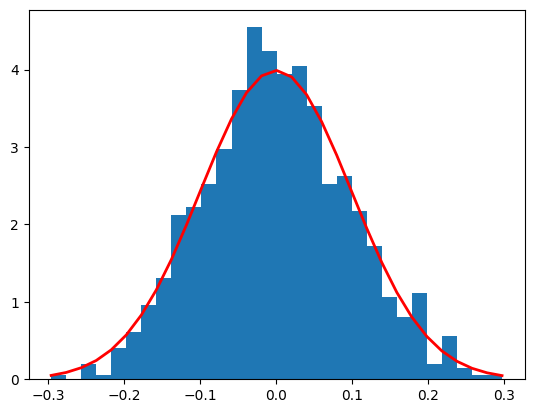

In [2]:
# Display the histogram of the samples, along with the probability density function:
%matplotlib inline
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


#### random.rand(d0, d1, ..., dn)
- 주어진 모양의 배열을 만들고 `[0, 1)` 의 균일 분포에서 무작위 샘플로 채웁니다.
  - 주: 1 이라는 값은 나오지 않는다.
  
- d0, d1, ..., dn
  - int, 선택 사항
    - 반환되는 배열의 차원은 음수가 아니어야 합니다. 인자가 지정되지 않으면 단일 파이썬 부동 소수점이 반환됩니다.
- 반환값:
  - ndarray, shape (d0, d1, ..., dn)
    - 임의의 값.

In [9]:
print(np.random.rand(3,2))

print(np.random.rand(1), np.random.rand())
# 결과가 서로 다르다. 첫번째는 1차원 벡터, 두번째는 무차원 스칼라 값이다.

[[0.73285843 0.89008389]
 [0.73627864 0.97189641]
 [0.10523864 0.35403705]]
[0.80628055] 0.8730913467187253


#### random.randint(low, high=None, size=None, dtype=int)

- low(inclusive)에서 high(exclusive)까지의 임의의 정수를 반환.
- 지정된 dtype의 "이산 균일" 분포의 "반-개방" 구간[low, high)에서 임의의 정수를 반환합니다.
- high 가 None 또는 없는 경우, 결과는 [0, low]의 범위에서 동작함.

In [3]:
print(np.random.randint(2, size=10)) # 0 또는 1, 10개 요소의 리스트
print(np.random.randint(1, size=10)) # 0 으로만 생성
print(np.random.randint(5, size=(2, 4))) # 0~4 숫자. 2x4 행렬

[0 0 0 0 1 0 1 1 1 0]
[0 0 0 0 0 0 0 0 0 0]
[[4 2 1 1]
 [1 2 2 4]]


In [5]:
# Generate a 1 x 3 array with 3 different upper bounds
# high 값에 숫자가 아닌 array 가 지정되었음. 각각 [1,3), [1,5), [1,10) 범위의 세 랜덤값이 생성됨. 결과는 리스트.
# size 에 (3,) 을 지정하지 않고도 이렇게 low, high array 로 지정하여 랜덤 벡터, 랜덤 행렬을 생성할 수 있음.
print(np.random.randint(1, [3, 5, 10]))

# Generate a 1 by 3 array with 3 different lower bounds
# 이것 또한 [1,10), [5,10), [7,10) 범위의 세 랜덤 값 생성.
print(np.random.randint([1, 5, 7], 10))

# Generate a 2 by 4 array using broadcasting with dtype of uint8
# low 는 1차원, high 가 2차원이므로, 결과는 2차원이 되어야 한다.
# low는 (4,) 에서 (2,4)로 브로드캐스팅 된다. [[1,3,5,7],[1,3,5,7]]
# high는 (2,1) 에서 (2,4)로 브로드캐스팅 된다. [[10,10,10,10],[20,20,20,20]]
print(np.random.randint([1, 3, 5, 7], [[10], [20]], dtype=np.uint8))

[2 3 8]
[1 8 8]
[[ 2  9  8  7]
 [10 11 14  7]]
